In [2]:
!conda install -c conda-forge beautifulsoup4 --yes 
!conda install -c conda-forge geocoder --yes 
!conda install -c conda-forge request --yes
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forg

<h1> Datasets dowload and data pre-processing </h1>

In [3]:
from bs4 import BeautifulSoup
import requests
wiki_data=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
processed_data = BeautifulSoup(wiki_data)


<h3>To generate table containing postal codes for each neighbourhood in Toronto</h3>

In [4]:
import pandas
wiki_data2=processed_data.find('table',class_='wikitable sortable').tbody
lines=wiki_data2.find_all('tr')
cols= [r.text.replace('\n','') for r in lines[0].find_all('th')]
df=pandas.DataFrame(columns=cols)  
for i in range(1,len(lines)):
    cells=lines[i].find_all('td')
    if(cells[1].text!="Not assigned"):
        if(cells[2].text=='Not assigned\n'): 
            values=[cells[0].text,cells[1].text,cells[1].text.replace('\n','')]
        else:
            values=[cells[0].text,cells[1].text,cells[2].text.replace('\n','')]
            
        df=df.append(pandas.Series(values,index=cols),ignore_index=True)
df['Neighbourhood']=df[['Postcode','Borough','Neighbourhood']].groupby(df['Postcode'])['Neighbourhood'].transform(lambda x: ','.join(x))
final_res=df.drop_duplicates()
final_res.head()




Postcode           Borough                    Neighbourhood
0      M3A        North York                        Parkwoods
1      M4A        North York                 Victoria Village
2      M5A  Downtown Toronto                     Harbourfront
3      M6A        North York  Lawrence Heights,Lawrence Manor
5      M7A  Downtown Toronto                     Queen's Park

<h3>Merge table containing Coordinates for each postal code with the above table </h3>

In [5]:
#!conda install -c conda-forge geocoder --yes 

In [6]:
import numpy as np
import pandas as pd
import json
#import request
from pandas.io.json import json_normalize
pd.set_option('display.max_rows', None)
coord=pd.read_csv('Geospatial_Coordinates.csv')
coord.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

<h3> Merging table containing Postal code</h3>

In [7]:
df2=pd.read_csv('post.csv')
final_op = pd.merge(left=df2,right=coord,left_on='Postcode',right_on='Postal Code')
final_op.drop('Postal Code',axis=1)

Postcode           Borough  \
0        M3A        North York   
1        M4A        North York   
2        M5A  Downtown Toronto   
3        M6A        North York   
4        M7A  Downtown Toronto   
5        M9A      Queen's Park   
6        M1B       Scarborough   
7        M3B        North York   
8        M4B         East York   
9        M5B  Downtown Toronto   
10       M6B        North York   
11       M9B         Etobicoke   
12       M1C       Scarborough   
13       M3C        North York   
14       M4C         East York   
15       M5C  Downtown Toronto   
16       M6C              York   
17       M9C         Etobicoke   
18       M1E       Scarborough   
19       M4E      East Toronto   
20       M5E  Downtown Toronto   
21       M6E              York   
22       M1G       Scarborough   
23       M4G         East York   
24       M5G  Downtown Toronto   
25       M6G  Downtown Toronto   
26       M1H       Scarborough   
27       M2H        North York   
28       M3H        North York   
29       M4H         East York   
30       M5H  Downtown Toronto   
31       M6H      West Toronto   
32       M1J       Scarborough   
33       M2J        North York   
34       M3J        North York   
35       M4J         East York   
36       M5J  Downtown Toronto   
37       M6J      West Toronto   
38       M1K       Scarborough   
39       M2K        North York   
40       M3K        North York   
41       M4K      East Toronto   
42       M5K  Downtown Toronto   
43       M6K      West Toronto   
44       M1L       Scarborough   
45       M2L        North York   
46       M3L        North York   
47       M4L      East Toronto   
48       M5L  Downtown Toronto   
49       M6L        North York   
50       M9L        North York   
51       M1M       Scarborough   
52       M2M        North York   
53       M3M        North York   
54       M4M      East Toronto   
55       M5M        North York   
56       M6M              York   
57       M9M        North York   
58       M1N       Scarborough   
59       M2N        North York   
60       M3N        North York   
61       M4N   Central Toronto   
62       M5N   Central Toronto   
63       M6N              York   
64       M9N              York   
65       M1P       Scarborough   
66       M2P        North York   
67       M4P   Central Toronto   
68       M5P   Central Toronto   
69       M6P      West Toronto   
70       M9P         Etobicoke   
71       M1R       Scarborough   
72       M2R        North York   
73       M4R   Central Toronto   
74       M5R   Central Toronto   
75       M6R      West Toronto   
76       M7R       Mississauga   
77       M9R         Etobicoke   
78       M1S       Scarborough   
79       M4S   Central Toronto   
80       M5S  Downtown Toronto   
81       M6S      West Toronto   
82       M1T       Scarborough   
83       M4T   Central Toronto   
84       M5T  Downtown Toronto   
85       M1V       Scarborough   
86       M4V   Central Toronto   
87       M5V  Downtown Toronto   
88       M8V         Etobicoke   
89       M9V         Etobicoke   
90       M1W       Scarborough   
91       M4W  Downtown Toronto   
92       M5W  Downtown Toronto   
93       M8W         Etobicoke   
94       M9W         Etobicoke   
95       M1X       Scarborough   
96       M4X  Downtown Toronto   
97       M5X  Downtown Toronto   
98       M8X         Etobicoke   
99       M4Y  Downtown Toronto   
100      M7Y      East Toronto   
101      M8Y         Etobicoke   
102      M8Z         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656  
1                                     Victoria Village  43.725882 -79.315572  
2                                         Harbourfront  43.654260 -79.360636  
3                      Lawrence Heights,Lawrence Manor  43.718518 -79.464763  
4                                         Queen's Park  43.662301 -79.38

<h3>My Foursquare API client ID and client secret</h3>

In [8]:
CLIENT_ID = 'BBOE20U0ZZNFQSETDSZKECICK2U5ELDSDOFCDFEYZJHT0MJS' # your Foursquare ID
CLIENT_SECRET = 'LKYNXHJAG3IP3GW1XOOXUDR1E0XVWTI4SUYMQO4YUZV2EKQJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT=100
radius=500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BBOE20U0ZZNFQSETDSZKECICK2U5ELDSDOFCDFEYZJHT0MJS
CLIENT_SECRET:LKYNXHJAG3IP3GW1XOOXUDR1E0XVWTI4SUYMQO4YUZV2EKQJ


<h3>Download of all the venue details from Foursquare API</h3>

In [9]:
import geopy
import folium
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize 

addr = 'Toronto'

geoloc = Nominatim(user_agent="canada_explorer")
loc = geoloc.geocode(addr)
lati = loc.latitude
longi = loc.longitude
print('The Toronto coordinates are {}, {}.'.format(lati, longi))

radius = 500 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lati, 
   longi, 
    radius, 
   LIMIT)

results = requests.get(url).json()
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

The Toronto coordinates are 43.653963, -79.387207.


name           categories        lat        lng
0    Downtown Toronto         Neighborhood  43.653232 -79.385296
1             Japango     Sushi Restaurant  43.655268 -79.385165
2          Rolltation  Japanese Restaurant  43.654918 -79.387424
3  Sansotei Ramen 三草亭     Ramen Restaurant  43.655157 -79.386501
4           Poke Guys           Poke Place  43.654895 -79.385052

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venue_data=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
              
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        venue_info = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venue_data.append([(
            name, 
            lat, 
            lng, 
            vd['venue']['name'], 
            vd['venue']['location']['lat'], 
            vd['venue']['location']['lng'],  
            vd['venue']['categories'][0]['name']) for vd in venue_info])

    other_venues = pd.DataFrame([item for venue_data in venue_data for item in venue_data])
    other_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  ]
    
    return(other_venues)

In [11]:
canada_venues = getNearbyVenues(names=final_op['Neighbourhood'],
                                   latitudes=final_op['Latitude'],
                                   longitudes=final_op['Longitude'],
                                  )

In [12]:
canada_venues.head()



Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Parkwoods              43.753259              -79.329656   
1    Parkwoods              43.753259              -79.329656   
2    Parkwoods              43.753259              -79.329656   
3    Parkwoods              43.753259              -79.329656   
4    Parkwoods              43.753259              -79.329656   

             Venue  Venue Latitude  Venue Longitude        Venue Category  
0  Brookbanks Park       43.751976       -79.332140                  Park  
1         PetSmart       43.748639       -79.333488             Pet Store  
2              KFC       43.754387       -79.333021  Fast Food Restaurant  
3    Variety Store       43.751974       -79.333114     Food & Drink Shop  
4  The Bing Suites       43.747816       -79.332190       Bed & Breakfast

In [13]:
restaurant = ['Italian Restaurant','Japanese Restaurant','Jewish Restaurant','Korean Restaurant','Mediterranean Restaurant','Mexican Restaurant','Middle Eastern Restaurant','Modern European Restaurant','Moroccan Restaurant','Peruvian Restaurant','Restaurant','Russian Restaurant','Scandinavian Restaurant','Seafood Restaurant','Spanish Restaurant','Sushi Restaurant','Thai Restaurant','Theme Restaurant','Turkish Restaurant','Ukrainian Restaurant','Vegetarian / Vegan Restaurant','Vietnamese Restaurant','Steakhouse','American Restaurant','Argentinian Restaurant','Asian Restaurant','Belgian Restaurant','Caucasian Restaurant','Chinese Restaurant','Comfort Food Restaurant','Czech Restaurant','Eastern European Restaurant','English Restaurant','French Restaurant','Gastropub','German Restaurant','Gourmet Shop','Greek Restaurant','Halal Restaurant','Hawaiian Restaurant','Indian Restaurant','Israeli Restaurant',]

# Miscellaneous food serving food channels
other_food = ['Fried Chicken Joint','Hot Dog Joint','Kebab Restaurant','Noodle House','Pelmeni House','Pizza Place','Shawarma Place','Udon Restaurant','Wings Joint','Fish & Chips Shop','Pastry Shop','Pie Shop','Salad Place','Sandwich Place','Snack Place','Soup Place','Buffet','Diner','Frozen Yogurt Shop','Ice Cream Shop','BBQ Joint','Bistro','Blini House','Creperie','Donut Shop','Burger Joint','Breakfast Spot','Dumpling Restaurant','Falafel Restaurant','Fast Food Restaurant','Food Court',]
#Cafes and bakery
cafe =['Bakery','Bagel Shop','Café','Cafeteria','Coffee Shop','Cupcake Shop','Dessert Shop']
# Liquor serving food channels
Liq = ['Cocktail Bar','Dive Bar','Hotel Bar','Irish Pub','Bar','Beer Bar','Beer Garden','Brewery','Karaoke Bar','Lounge','Pub','Sports Bar','Whisky Bar','Wine Bar','Wine Shop']

In [21]:
canada_restaurant = canada_venues.loc[canada_venues['Venue Category'].isin(restaurant)]
canada_otherfood = canada_venues.loc[canada_venues['Venue Category'].isin(other_food)]
canada_liq = canada_venues.loc[canada_venues['Venue Category'].isin(Liq)]
canada_cafe = canada_venues.loc[canada_venues['Venue Category'].isin(cafe)]

<h3> To check number of venues in each Main category:</h3>

In [22]:

print('In Toronto, there are', canada_restaurant.shape[0], 'restaurants,', canada_liq.shape[0], 'liquor serving food channels,', canada_liq.shape[0], 'cafes & bakeries,', canada_otherfood.shape[0], 'other food venues present.')

In Toronto, there are 711 restaurants, 207 liquor serving food channels, 207 cafes & bakeries, 464 other food venues present.


In [25]:
# To add a main category for each venue
canada_liq.insert(6,'MainCategory','Liquor serving')
canada_otherfood.insert(6,'MainCategory','Other food')
canada_restaurant.insert(6,'MainCategory','Restaurant')
canada_cafe.insert(6,'MainCategory','Cafe/Bakery')



In [26]:
canada_cafe.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
7   Victoria Village              43.725882              -79.315572   
14  Victoria Village              43.725882              -79.315572   
17      Harbourfront              43.654260              -79.360636   
18      Harbourfront              43.654260              -79.360636   
29      Harbourfront              43.654260              -79.360636   

               Venue  Venue Latitude  Venue Longitude MainCategory  \
7        Tim Hortons       43.725517       -79.313103  Cafe/Bakery   
14           JJ Bean       43.720229       -79.313561  Cafe/Bakery   
17  Roselle Desserts       43.653447       -79.362017  Cafe/Bakery   
18     Tandem Coffee       43.653559       -79.361809  Cafe/Bakery   
29          Cacao 70       43.650067       -79.360723  Cafe/Bakery   

   Venue Category  
7     Coffee Shop  
14           Café  
17         Bakery  
18    Coffee Shop  
29   Dessert Shop

In [27]:
all_venues = [canada_restaurant, canada_otherfood, canada_liq, canada_cafe]
all_food_data = pd.concat(all_venues)
all_food_data.head()
#all_food_data

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
9   Victoria Village              43.725882              -79.315572   
21      Harbourfront              43.654260              -79.360636   
33      Harbourfront              43.654260              -79.360636   
38      Harbourfront              43.654260              -79.360636   
39      Harbourfront              43.654260              -79.360636   

                         Venue  Venue Latitude  Venue Longitude MainCategory  \
9                     The Frig       43.727051       -79.317418   Restaurant   
21              Impact Kitchen       43.656369       -79.356980   Restaurant   
33                 Souk Tabule       43.653756       -79.354390   Restaurant   
38   Mangia and Bevi Resto-Bar       43.652250       -79.366355   Restaurant   
39  Cluny Bistro & Boulangerie       43.650565       -79.357843   Restaurant   

              Venue Category  
9          French Restaurant  
21                Restaurant  
33  Mediterranean Restaurant  
38        Italian Restaurant  
39         French Restaurant

In [ ]:
#'Main Category','Liquor serving','Other food','Restaurant','Cafe/Bakery'


In [29]:

# create a whole new dataframe, containing all the information about our venues
#canada_data2=canada_data2.rename(columns={'X': 'Neighborhood Latitude', 'Y': 'Neighborhood Longitude'})
food_data_count=all_food_data.groupby('Neighborhood').count()
#1food_data2 = pd.merge(canada_data2, food_data, how='right', on=['Neighborhood Latitude', 'Neighborhood Longitude'])
all_food_data.head()
# make it look good
#food_data = food_data.rename(columns={'Latitude_x': 'Latitude', 'Longitude_x': 'Longitude'})
#food_data = food_data[['FullPlaceName', 'District', 'Borough', 'Latitude', 'Longitude', 'Population', 'Venue', 'VenueLatitude', 'VenueLongitude', 'CommonCategory', 'Category']].dropna()
#print(food_data.shape)
#food_data2.tail(1000)
#final_op.head()
food_data2 = pd.merge(left=all_food_data,right=final_op,left_on='Neighborhood',right_on='Neighbourhood')
food_data2.drop('Latitude', axis=1, inplace=True)
food_data2.drop('Longitude', axis=1, inplace=True)
food_data2.drop('Postcode', axis=1, inplace=True)
food_data2.drop('Neighbourhood', axis=1, inplace=True)
#food_data2.drop('Main Category', axis=1, inplace=True)
food_data2.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Victoria Village              43.725882              -79.315572   
1  Victoria Village              43.725882              -79.315572   
2  Victoria Village              43.725882              -79.315572   
3  Victoria Village              43.725882              -79.315572   
4      Harbourfront              43.654260              -79.360636   

            Venue  Venue Latitude  Venue Longitude MainCategory  \
0        The Frig       43.727051       -79.317418   Restaurant   
1      Pizza Nova       43.725824       -79.312860   Other food   
2     Tim Hortons       43.725517       -79.313103  Cafe/Bakery   
3         JJ Bean       43.720229       -79.313561  Cafe/Bakery   
4  Impact Kitchen       43.656369       -79.356980   Restaurant   

      Venue Category           Borough Postal Code  
0  French Restaurant        North York         M4A  
1        Pizza Place        North York         M4A  
2        Coffee Shop        North York         M4A  
3               Café        North York         M4A  
4         Restaurant  Downtown Toronto         M5A

In [41]:
#'Main Category','Liquor serving','Other food','Restaurant','Cafe/Bakery'
colors = {'Liquor serving': 'blue', 'Other food': 'green', 'Cafe/Bakery':'red', 'Restaurant':'orange' }

d=['Harbourfront', 'Church and Wellesley']

food_data1=food_data2.loc[food_data2['Neighborhood'].isin(d)]
food_data1.head()
address = 'Etobicoke'
geolocator = Nominatim(user_agent='IBM')
location = geolocator.geocode(address)
lati = location.latitude
longi = location.longitude

map_canada = folium.Map(location=[lati, longi], zoom_start=10)
#a = zip(food_data['Venue Latitude'], food_data['Venue Longitude'],food_data['Venue Category'], food_data['Neighborhood'])

for lati, longi, CommonCategory, Neighborhood in zip(food_data1['Venue Latitude'], food_data1['Venue Longitude'],food_data1['MainCategory'], food_data1['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, CommonCategory)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lati, longi],
        radius=5,
        popup=label,
        color=colors[CommonCategory],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canada)  
    
map_canada
#food_data1
#a

In [31]:
food_data2.groupby(['MainCategory'])['Venue Category'].value_counts()


MainCategory    Venue Category               
Cafe/Bakery     Coffee Shop                      289
                Café                             149
                Bakery                            75
                Dessert Shop                      26
                Bagel Shop                         7
                Cafeteria                          1
                Cupcake Shop                       1
Liquor serving  Bar                               63
                Pub                               40
                Beer Bar                          27
                Brewery                           23
                Lounge                            16
                Cocktail Bar                      13
                Sports Bar                        10
                Wine Bar                           9
                Hotel Bar                          5
                Wine Shop                          2
                Dive Bar                           1


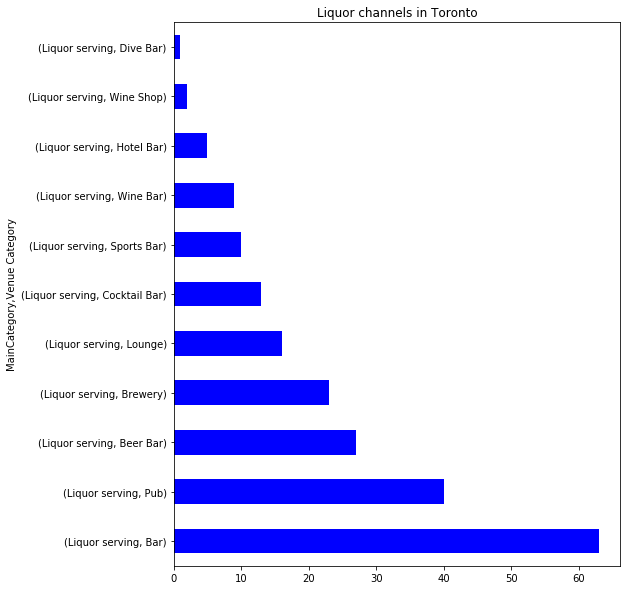

In [35]:
food_data2[food_data2.MainCategory == 'Liquor serving'].groupby(['MainCategory'])['Venue Category'].value_counts(normalize=False).plot(kind='barh', figsize=(8,10), color='blue', title='Liquor channels in Toronto')


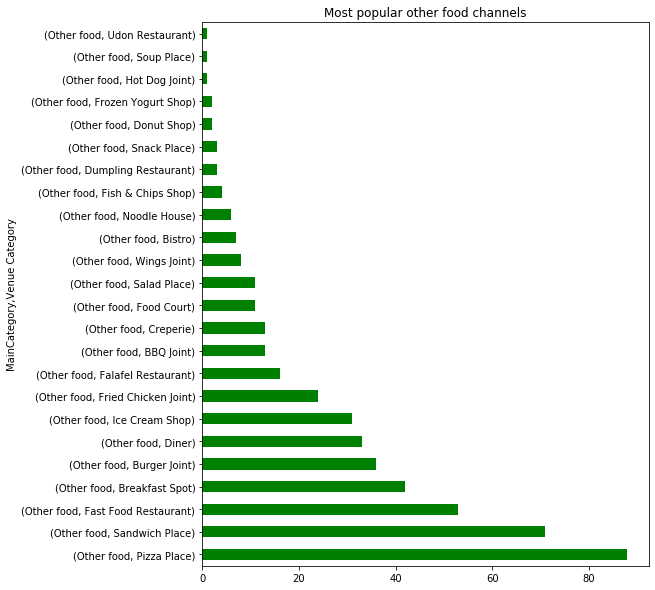

In [43]:
##'Main Category','Liquor serving','Other food','Restaurant','Cafe/Bakery'
food_data2[food_data2.MainCategory == 'Other food'].groupby(['MainCategory'])['Venue Category'].value_counts(normalize=False).plot(kind='barh', figsize=(8,10), color='green', title='Most popular other food channels')


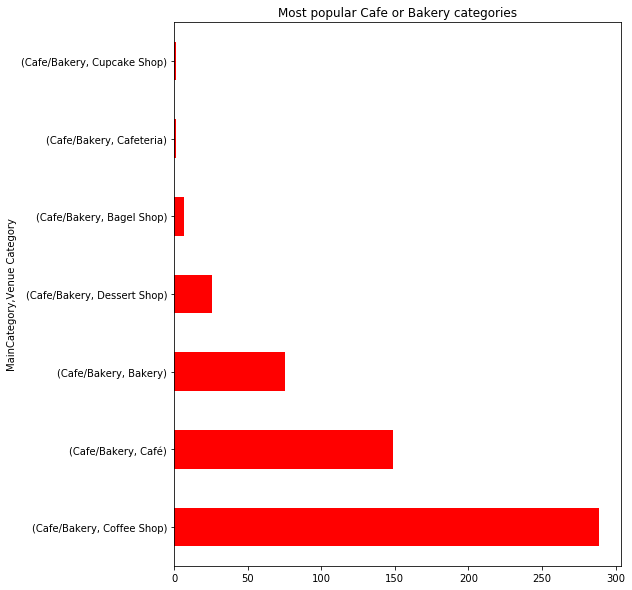

In [44]:
food_data2[food_data2.MainCategory == 'Cafe/Bakery'].groupby(['MainCategory'])['Venue Category'].value_counts(normalize=False).plot(kind='barh', figsize=(8,10), color='red', title='Most popular Cafe or Bakery categories')

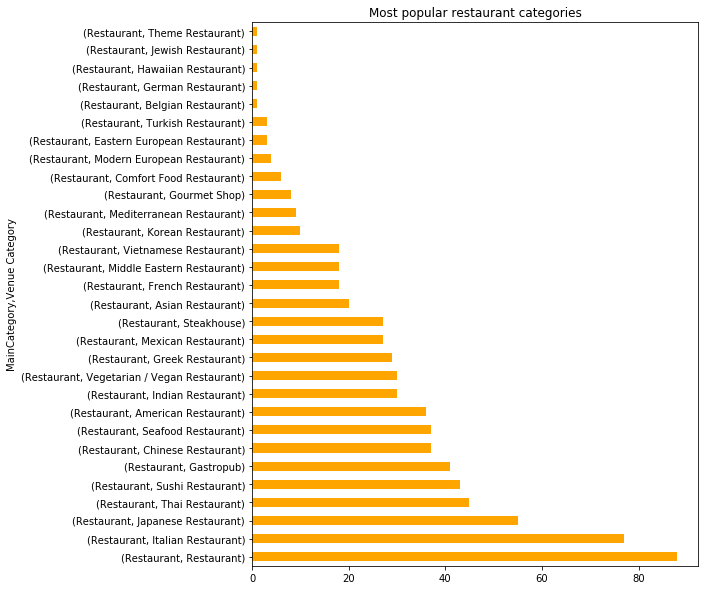

In [47]:
#colors = {'Liquor serving': 'blue', 'Other food': 'green', 'Cafe/Bakery':'red', 'Restaurant':'yellow' }

food_data2[food_data2.MainCategory == 'Restaurant'].groupby(['MainCategory'])['Venue Category'].value_counts(normalize=False).plot(kind='barh', figsize=(8,10), color='orange', title='Most popular restaurant categories')

In [46]:
food_data2.groupby(['Borough'])['MainCategory'].value_counts()

Borough           MainCategory  
Central Toronto   Restaurant         61
                  Other food         45
                  Cafe/Bakery        40
                  Liquor serving     13
Downtown Toronto  Restaurant        358
                  Cafe/Bakery       287
                  Other food        167
                  Liquor serving    103
East Toronto      Restaurant         64
                  Other food         50
                  Cafe/Bakery        41
                  Liquor serving     26
East York         Other food         22
                  Restaurant         21
                  Cafe/Bakery        14
                  Liquor serving      7
Etobicoke         Other food         26
                  Cafe/Bakery        16
                  Restaurant         13
                  Liquor serving      2
Mississauga       Restaurant         13
                  Other food          9
                  Cafe/Bakery         4
North York        Restaurant         68
       

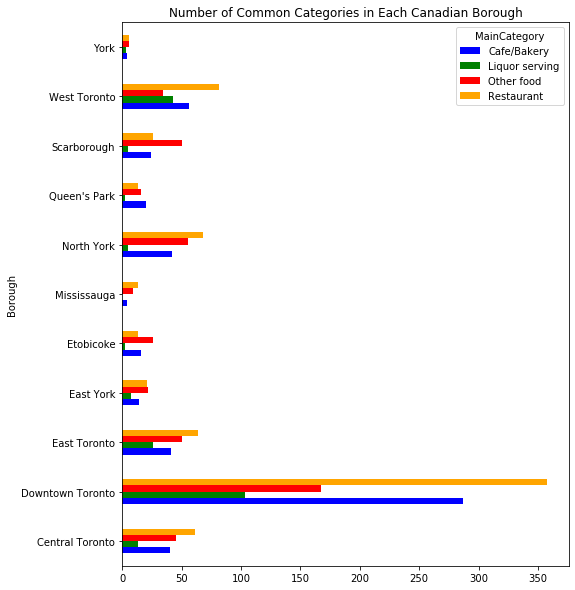

In [48]:
#colors = {'Liquor serving': 'blue', 'Other food': 'green', 'Cafe/Bakery':'red', 'Restaurant':'yellow' }

cc_freq = pd.crosstab([food_data2.Borough],food_data2['MainCategory'])
cc_freq.plot(kind='barh', figsize=(8,10), color = ['blue', 'green', 'red','orange'], title='Number of Common Categories in Each Canadian Borough')

In [ ]:
# count how many of each category we have
food_data2['MainCategory'].value_counts()

In [50]:

import json
import itertools
import pandas as pd
from geopy.geocoders import Nominatim
import requests
import folium
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
import collections
from sklearn.cluster import KMeans


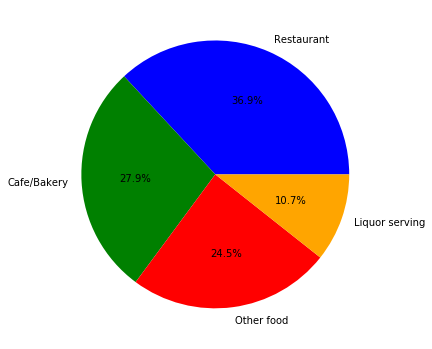

In [52]:
# Pie Chart

ven_cnt = dict(food_data2['MainCategory'].value_counts())
clrs = ['blue', 'green', 'red','orange']
vlbls = ven_cnt.keys()
vvls = ven_cnt.values()
plt.figure(figsize=(6,8))
plt.pie(vvls, colors=clrs, labels=vlbls, autopct='%1.1f%%')
plt.show()

In [54]:
##'Main Category','Liquor serving','Other food','Restaurant','Cafe/Bakery'

# how many bars in each district
food_data2[food_data2.MainCategory == 'Liquor serving'].groupby(['Borough'])['MainCategory'].value_counts(normalize=False)

Borough           MainCategory  
Central Toronto   Liquor serving     13
Downtown Toronto  Liquor serving    103
East Toronto      Liquor serving     26
East York         Liquor serving      7
Etobicoke         Liquor serving      2
North York        Liquor serving      5
Queen's Park      Liquor serving      2
Scarborough       Liquor serving      5
West Toronto      Liquor serving     43
York              Liquor serving      3
Name: MainCategory, dtype: int64

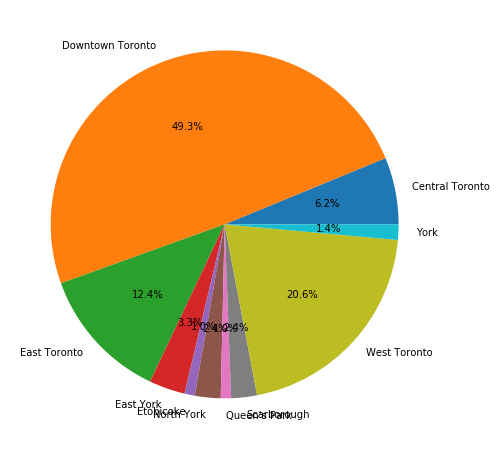

In [55]:

# plot bars
bar_cnt = collections.OrderedDict(food_data2[food_data2.MainCategory == 'Liquor serving'].groupby(['Borough'])['MainCategory'].value_counts(normalize=False))
blbls = [i[0] for i in bar_cnt.keys()]
bvls = bar_cnt.values()
f = [i[0] for i in bar_cnt.keys()]
plt.figure(figsize=(8,8))
plt.pie(bvls,  labels=blbls, autopct='%1.1f%%')
plt.show()

In [57]:
# how many restaurants in each district
food_data2[food_data2.MainCategory == 'Restaurant'].groupby(['Borough'])['MainCategory'].value_counts(normalize=False)

Borough           MainCategory
Central Toronto   Restaurant       61
Downtown Toronto  Restaurant      358
East Toronto      Restaurant       64
East York         Restaurant       21
Etobicoke         Restaurant       13
Mississauga       Restaurant       13
North York        Restaurant       68
Queen's Park      Restaurant       13
Scarborough       Restaurant       26
West Toronto      Restaurant       81
York              Restaurant        6
Name: MainCategory, dtype: int64

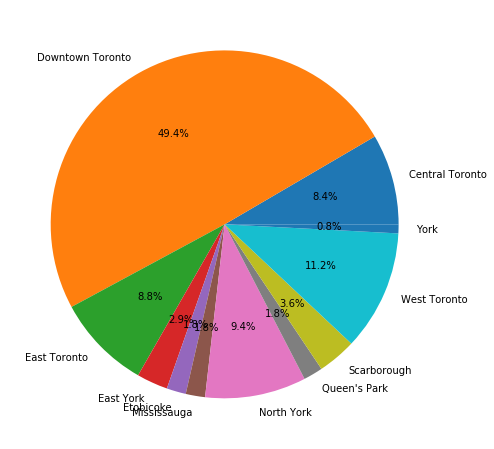

In [58]:
# plot restaurants
rest_cnt = collections.OrderedDict(food_data2[food_data2.MainCategory == 'Restaurant'].groupby(['Borough'])['MainCategory'].value_counts(normalize=False))
rlbls = [i[0] for i in rest_cnt.keys()]
rvls = rest_cnt.values()
f = [i[0] for i in rest_cnt.keys()]
plt.figure(figsize=(8,8))
plt.pie(rvls,  labels=rlbls, autopct='%1.1f%%')
plt.show()

In [59]:

# number of fastfood venues in each district
food_data2[food_data2.MainCategory == 'Other food'].groupby(['Borough'])['MainCategory'].value_counts(normalize=False)

Borough           MainCategory
Central Toronto   Other food       45
Downtown Toronto  Other food      167
East Toronto      Other food       50
East York         Other food       22
Etobicoke         Other food       26
Mississauga       Other food        9
North York        Other food       55
Queen's Park      Other food       16
Scarborough       Other food       50
West Toronto      Other food       34
York              Other food        6
Name: MainCategory, dtype: int64

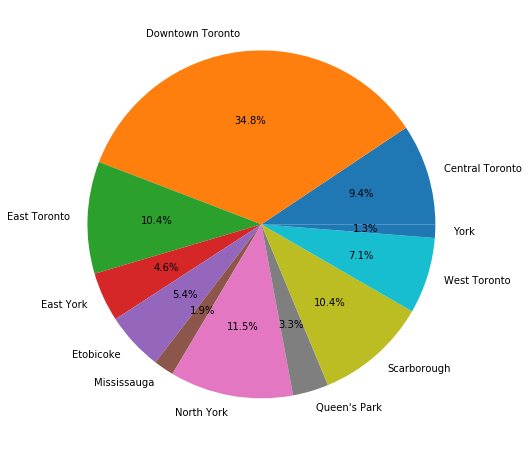

In [60]:
#colors = {'Liquor serving': 'blue', 'Other food': 'green', 'Cafe/Bakery':'red', 'Restaurant':'yellow' }

ff_cnt = collections.OrderedDict(food_data2[food_data2.MainCategory == 'Other food'].groupby(['Borough'])['MainCategory'].value_counts(normalize=False))
fflbls = [i[0] for i in ff_cnt.keys()]
ffvls = ff_cnt.values()
f = [i[0] for i in ff_cnt.keys()]
plt.figure(figsize=(8,8))
plt.pie(ffvls,  labels=fflbls, autopct='%1.1f%%')
plt.show()

In [61]:
#colors = {'Liquor serving': 'blue', 'Other food': 'green', 'Cafe/Bakery':'red', 'Restaurant':'yellow' }

latitude=43.6532
longitude=-79.3832
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10)
for label, cat, lat, long in zip(food_data2['Venue'], food_data2['MainCategory'], food_data2['Venue Latitude'], food_data2['Venue Longitude']):
    if cat == 'Liquor serving':
        clr = 'blue'
    elif cat == 'Restaurant':
        clr = 'orange'
    elif cat == 'Other food':
        clr = 'green'
    elif cat == 'Cafe/Bakery':
        clr = 'red'    
    else:
        clr = 'black'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, long], radius = 1, popup = label, color = clr, fill = False, fill_color = 'white', fill_opacity = 0.5, parse_html = False).add_to(venues_map)
venues_map.save("venue.html")

In [62]:
import geopy.distance
adr1 = 'Harbourfront, Canada'
geolocator = Nominatim(user_agent='IBM')
lc1 = geolocator.geocode(adr1)
lt1 = lc1.latitude
lo1 = lc1.longitude
print('Coordinates of {} are {}, {}.'.format(adr1, lt1, lo1))
print()
adr2 = 'Church and Wellesley, Canada'
geolocator = Nominatim(user_agent='IBM')
lc2 = geolocator.geocode(adr2)
lt2 = lc2.latitude
lo2 = lc2.longitude
print('Coordinates of {} are {}, {}.'.format(adr2, lt2, lo2))

Coordinates of Harbourfront, Canada are 43.6400801, -79.3801495.

Coordinates of Church and Wellesley, Canada are 43.6655242, -79.3838011.


In [63]:
print(geopy.distance.distance((lt1, lo1), (lt2, lo2)))

2.8422855604294637 km


In [64]:
def distancometer(x, y):
    v1 = (x,y)
    toronto = (43.6532, -79.3832)
    return geopy.distance.distance(toronto, v1)
food_data2['Distance'] = food_data2.apply(lambda x: distancometer(x['Neighborhood Latitude'], x['Neighborhood Longitude']),axis=1)
food_data2.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Victoria Village              43.725882              -79.315572   
1  Victoria Village              43.725882              -79.315572   
2  Victoria Village              43.725882              -79.315572   
3  Victoria Village              43.725882              -79.315572   
4      Harbourfront              43.654260              -79.360636   

            Venue  Venue Latitude  Venue Longitude MainCategory  \
0        The Frig       43.727051       -79.317418   Restaurant   
1      Pizza Nova       43.725824       -79.312860   Other food   
2     Tim Hortons       43.725517       -79.313103  Cafe/Bakery   
3         JJ Bean       43.720229       -79.313561  Cafe/Bakery   
4  Impact Kitchen       43.656369       -79.356980   Restaurant   

      Venue Category           Borough Postal Code               Distance  
0  French Restaurant        North York         M4A     9.7438088475991 km  
1        Pizza Place        North York         M4A     9.7438088475991 km  
2        Coffee Shop        North York         M4A     9.7438088475991 km  
3               Café        North York         M4A     9.7438088475991 km  
4         Restaurant  Downtown Toronto         M5A  1.8240779832081802 km

In [65]:
food_data2['Distance'] = food_data2.Distance.astype(str).str[:-3].astype(float)

In [66]:
distances = pd.DataFrame(food_data2.groupby(['Neighborhood', 'Distance','Borough'])['Venue'].count().reset_index())
distances.head()

Neighborhood   Distance  \
0                             Adelaide,King,Richmond   0.312215   
1                                          Agincourt  18.459543   
2  Agincourt North,L'Amoreaux East,Milliken,Steel...  19.680298   
3  Albion Gardens,Beaumond Heights,Humbergate,Jam...  19.117991   
4                              Alderwood,Long Branch  14.112961   

            Borough  Venue  
0  Downtown Toronto     58  
1       Scarborough      4  
2       Scarborough     12  
3         Etobicoke      5  
4         Etobicoke      5

In [67]:
distances = distances.sort_values(by=['Distance'], ascending=True)
distances.head()

Neighborhood  Distance           Borough  Venue
0                  Adelaide,King,Richmond  0.312215  Downtown Toronto     58
43  First Canadian Place,Underground city  0.535231  Downtown Toronto     68
75                Ryerson,Garden District  0.558582  Downtown Toronto     49
27          Commerce Court,Victoria Hotel  0.619102  Downtown Toronto     64
19                     Central Bay Street  0.626614  Downtown Toronto     59

[58, 68, 49, 64, 59, 54, 68, 63, 50, 50, 56, 65, 55, 56, 59, 39, 38, 45, 3, 67, 53, 10, 55, 37, 1, 39, 9, 19, 16, 1, 43, 27, 32, 16, 25, 12, 30, 3, 20, 27, 11, 37, 7, 4, 9, 11, 24, 4, 8, 11, 6, 3, 3, 12, 1, 4, 9, 1, 2, 1, 1, 11, 2, 3, 4, 11, 5, 39, 3, 3, 2, 5, 22, 5, 10, 3, 2, 1, 5, 5, 11, 3, 6, 4, 8, 9, 4, 3, 2, 26, 5, 12, 9, 4, 4]
Venues: [58, 68, 49, 64, 59, 54, 68, 63, 50, 50, 56, 65, 55, 56, 59, 39, 38, 45, 3, 67, 53, 10, 55, 37, 1, 39, 9, 19, 16, 1, 43, 27, 32, 16, 25, 12, 30, 3, 20, 27, 11, 37, 7, 4, 9, 11, 24, 4, 8, 11, 6, 3, 3, 12, 1, 4, 9, 1, 2, 1, 1, 11, 2, 3, 4, 11, 5, 39, 3, 3, 2, 5, 22, 5, 10, 3, 2, 1, 5, 5, 11, 3, 6, 4, 8, 9, 4, 3, 2, 26, 5, 12, 9, 4, 4]

Distances: [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18,

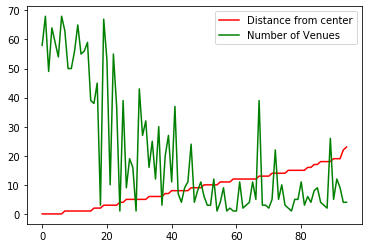

In [68]:
n = distances.Distance.to_list()
x = distances.Venue.to_list()
y = []
for i in n:
    y.append(int(i))
print(x)
print('Venues:', x)
print()
print('Distances:', y)
plt.plot(y, color='red')
plt.plot(x, color='green')
plt.legend(['Distance from center','Number of Venues'])
plt.show()

In [69]:
from scipy import stats
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=-0.20741466815420276, intercept=13.155159623688332, rvalue=-0.7404661866019256, pvalue=9.869718150737338e-18, stderr=0.01952192004107938)

(0, 72.88187665199266)

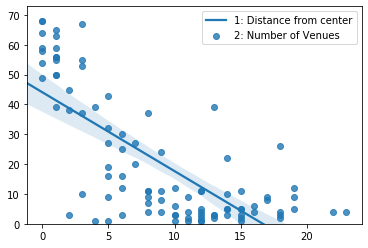

In [70]:
sns.regplot(y, x)
plt.legend(['1: Distance from center','2: Number of Venues'])
plt.ylim(0,)

(0, 24.3115927763305)

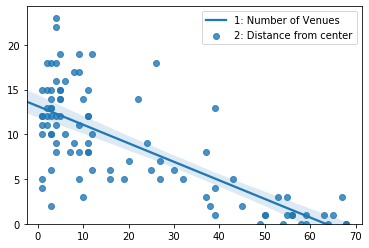

In [71]:
sns.regplot(x, y)
plt.legend(['1: Number of Venues', '2: Distance from center',])
plt.ylim(0,)

In [72]:
stats.pearsonr(y,x)

(-0.7404661866019253, 9.869718150737874e-18)

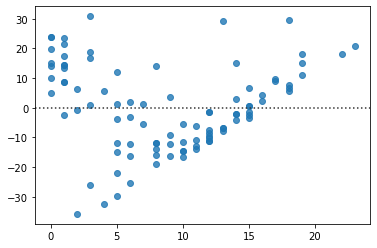

In [73]:

sns.residplot(y,x)

In [74]:
complete_data = pd.merge(food_data2, distances, on='Neighborhood')
complete_data = complete_data.drop(columns='Distance_y')
complete_data.head(1)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude   Venue_x  \
0  Victoria Village              43.725882              -79.315572  The Frig   

   Venue Latitude  Venue Longitude MainCategory     Venue Category  \
0       43.727051       -79.317418   Restaurant  French Restaurant   

    Borough_x Postal Code  Distance_x   Borough_y  Venue_y  
0  North York         M4A    9.743809  North York        4

In [75]:

# leave only the necessary data for clustering
ven_data = food_data2[['Borough', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category', 'Neighborhood']]

In [76]:
# one hot encoding
m_onehot = pd.get_dummies(ven_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
m_onehot['Borough'] = ven_data['Borough']

# move neighborhood column to the first column
fixed_columns = [m_onehot.columns[-1]] + list(m_onehot.columns[:-1])
m_onehot = m_onehot[fixed_columns]

m_onehot.head()

Borough  American Restaurant  Asian Restaurant  BBQ Joint  \
0        North York                    0                 0          0   
1        North York                    0                 0          0   
2        North York                    0                 0          0   
3        North York                    0                 0          0   
4  Downtown Toronto                    0                 0          0   

   Bagel Shop  Bakery  Bar  Beer Bar  Belgian Restaurant  Bistro  ...  \
0           0       0    0         0                   0       0  ...   
1           0       0    0         0                   0       0  ...   
2           0       0    0         0                   0       0  ...   
3           0       0    0         0                   0       0  ...   
4           0       0    0         0                   0       0  ...   

   Sushi Restaurant  Thai Restaurant  Theme Restaurant  Turkish Restaurant  \
0                 0                0                 0                   0   
1                 0                0                 0                   0   
2                 0                0                 0                   0   
3                 0                0                 0                   0   
4                 0                0                 0                   0   

   Udon Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                0                              0                      0   
1                0                              0                      0   
2                0                              0                      0   
3                0                              0                      0   
4                0                              0                      0   

   Wine Bar  Wine Shop  Wings Joint  
0         0          0            0  
1         0          0            0  
2         0          0            0  
3         0          0            0  
4         0          0            0  

[5 rows x 73 columns]

In [77]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
m_grouped = m_onehot.groupby('Borough').mean().reset_index()

In [78]:
# print each neighborhood along with the top 5 most common venues

for hood in m_grouped['Borough']:
#    print("----"+hood+"----")
    temp = m_grouped[m_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
#    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#    print('\n')


# put that into a pandas dataframe
# function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = m_grouped['Borough']

for ind in np.arange(m_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(m_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

Borough 1st Most Common Venue 2nd Most Common Venue  \
0   Central Toronto           Coffee Shop                  Café   
1  Downtown Toronto           Coffee Shop                  Café   
2      East Toronto           Coffee Shop      Greek Restaurant   
3         East York           Coffee Shop           Pizza Place   
4         Etobicoke           Pizza Place           Coffee Shop   
5       Mississauga    Chinese Restaurant           Coffee Shop   
6        North York           Coffee Shop           Pizza Place   
7      Queen's Park           Coffee Shop        Sandwich Place   
8       Scarborough           Coffee Shop  Fast Food Restaurant   
9      West Toronto                  Café                   Bar   

  3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place             Sandwich Place    Italian Restaurant   
1            Restaurant         Italian Restaurant                Bakery   
2                  Café                     Bakery        Sandwich Place   
3     Indian Restaurant                    Brewery            Restaurant   
4        Sandwich Place                     Bakery      Sushi Restaurant   
5           Pizza Place  Middle Eastern Restaurant   Fried Chicken Joint   
6  Fast Food Restaurant        Japanese Restaurant        Sandwich Place   
7                  Café         Italian Restaurant    Falafel Restaurant   
8           Pizza Place         Chinese Restaurant                Bakery   
9           Coffee Shop                 Restaurant    Italian Restaurant   

  6th Most Common Venue 7th Most Common Venue          8th Most Common Venue  \
0                   Pub       Thai Restaurant               Sushi Restaurant   
1   Japanese Restaurant                   Bar                      Gastropub   
2  Fast Food Restaurant                   Pub             Italian Restaurant   
3          Burger Joint  Fast Food Restaurant                 Sandwich Place   
4        Breakfast Spot                  Café           Fast Food Restaurant   
5      Sushi Restaurant     Indian Restaurant             Mexican Restaurant   
6            Restaurant                Bakery             Italian Restaurant   
7             Gastropub                 Diner                   Dessert Shop   
8        Breakfast Spot          Burger Joint              Indian Restaurant   
9                Bakery           Pizza Place  Vegetarian / Vegan Restaurant   

   9th Most Common Venue 10th Most Common Venue  
0      Indian Restaurant                  Diner  
1     Seafood Restaurant        Thai Restaurant  
2                    Bar         Ice Cream Shop  
3     Turkish Restaurant       Sushi Restaurant  
4    Fried Chicken Joint     Mexican Restaurant  
5         Sandwich Place           Burger Joint  
6  Vietnamese Restaurant                   Café  
7      Indian Restaurant            Pizza Place  
8         Sandwich Place    Fried Chicken Joint  
9         Breakfast Spot        Thai Restaurant

In [79]:
#Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 5

m_grouped_clustering = m_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(m_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [81]:
m_merged = ven_data[['Borough', 'Neighborhood', 'Venue Latitude', 'Venue Longitude']]
m_merged = m_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')
m_merged = m_merged.drop_duplicates(keep = 'first')
m_merged.head()

# m_merged = ven_data

# # merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
# m_merged = m_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

# m_merged.head() # check the last columns!

Borough      Neighborhood  Venue Latitude  Venue Longitude  \
0        North York  Victoria Village       43.727051       -79.317418   
1        North York  Victoria Village       43.725824       -79.312860   
2        North York  Victoria Village       43.725517       -79.313103   
3        North York  Victoria Village       43.720229       -79.313561   
4  Downtown Toronto      Harbourfront       43.656369       -79.356980   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               2           Coffee Shop           Pizza Place   
1               2           Coffee Shop           Pizza Place   
2               2           Coffee Shop           Pizza Place   
3               2           Coffee Shop           Pizza Place   
4               0           Coffee Shop                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Fast Food Restaurant   Japanese Restaurant        Sandwich Place   
1  Fast Food Restaurant   Japanese Restaurant        Sandwich Place   
2  Fast Food Restaurant   Japanese Restaurant        Sandwich Place   
3  Fast Food Restaurant   Japanese Restaurant        Sandwich Place   
4            Restaurant    Italian Restaurant                Bakery   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Restaurant                Bakery    Italian Restaurant   
1            Restaurant                Bakery    Italian Restaurant   
2            Restaurant                Bakery    Italian Restaurant   
3            Restaurant                Bakery    Italian Restaurant   
4   Japanese Restaurant                   Bar             Gastropub   

   9th Most Common Venue 10th Most Common Venue  
0  Vietnamese Restaurant                   Café  
1  Vietnamese Restaurant                   Café  
2  Vietnamese Restaurant                   Café  
3  Vietnamese Restaurant                   Café  
4     Seafood Restaurant        Thai Restaurant

In [82]:
# create map
mcl_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x) ** 2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
# rainbow = ['#ff0000','#00a336','#8000ff','#974e4c','#06b6eb']
rainbow = ['#e24a33', '#348abd','#988ed5','#777777','#fbc15e']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(m_merged['Venue Latitude'], m_merged['Venue Longitude'], m_merged['Borough'],
                                  m_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    try:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=1).add_to(mcl_map)
    except:
        continue

In [83]:
# show the cluster map
mcl_map

In [84]:
#Cluster 1
m_merged.loc[m_merged['Cluster Labels'] == 0, m_merged.columns[[0] + [1] + list(range(4, m_merged.shape[1]))]]


Borough                                       Neighborhood  \
4     Downtown Toronto                                       Harbourfront   
5     Downtown Toronto                                       Harbourfront   
6     Downtown Toronto                                       Harbourfront   
7     Downtown Toronto                                       Harbourfront   
8     Downtown Toronto                                       Harbourfront   
9     Downtown Toronto                                       Harbourfront   
10    Downtown Toronto                                       Harbourfront   
11    Downtown Toronto                                       Harbourfront   
12    Downtown Toronto                                       Harbourfront   
13    Downtown Toronto                                       Harbourfront   
14    Downtown Toronto                                       Harbourfront   
15    Downtown Toronto                                       Harbourfront   
16    Downtown Toronto                                       Harbourfront   
17    Downtown Toronto                                       Harbourfront   
18    Downtown Toronto                                       Harbourfront   
19    Downtown Toronto                                       Harbourfront   
20    Downtown Toronto                                       Harbourfront   
21    Downtown Toronto                                       Harbourfront   
22    Downtown Toronto                                       Harbourfront   
23    Downtown Toronto                                       Harbourfront   
24    Downtown Toronto                                       Harbourfront   
25    Downtown Toronto                                       Harbourfront   
26    Downtown Toronto                                       Harbourfront   
27    Downtown Toronto                                       Harbourfront   
28    Downtown Toronto                                       Harbourfront   
29    Downtown Toronto                                       Harbourfront   
30    Downtown Toronto                                       Harbourfront   
31    Downtown Toronto                                       Harbourfront   
32    Downtown Toronto                                       Harbourfront   
33    Downtown Toronto                                       Harbourfront   
34    Downtown Toronto                                       Harbourfront   
35    Downtown Toronto                                       Harbourfront   
36    Downtown Toronto                                       Harbourfront   
37    Downtown Toronto                                       Harbourfront   
38    Downtown Toronto                                       Harbourfront   
39    Downtown Toronto                                       Harbourfront   
40    Downtown Toronto                                       Harbourfront   
41    Downtown Toronto                                       Harbourfront   
42    Downtown Toronto                                       Harbourfront   
51    Downtown Toronto                                       Queen's Park   
53    Downtown Toronto                                       Queen's Park   
55    Downtown Toronto                                       Queen's Park   
57    Downtown Toronto                                       Queen's Park   
59    Downtown Toronto                                       Queen's Park   
61    Downtown Toronto                                       Queen's Park   
63    Downtown Toronto                                       Queen's Park   
65    Downtown Toronto                                       Queen's Park   
67    Downtown Toronto                                       Queen's Park   
69    Downtown Toronto                                       Queen's Park   
71    Downtown Toronto                                       Queen's Park   
73    Downtown Toronto                                       Queen's Park   
75    Downt

In [85]:
#Cluster 2
m_merged.loc[m_merged['Cluster Labels'] == 1, m_merged.columns[[1] + list(range(5, m_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
1321  Canada Post Gateway Processing Centre    Chinese Restaurant   
1322  Canada Post Gateway Processing Centre    Chinese Restaurant   
1323  Canada Post Gateway Processing Centre    Chinese Restaurant   
1324  Canada Post Gateway Processing Centre    Chinese Restaurant   
1325  Canada Post Gateway Processing Centre    Chinese Restaurant   
1326  Canada Post Gateway Processing Centre    Chinese Restaurant   
1327  Canada Post Gateway Processing Centre    Chinese Restaurant   
1328  Canada Post Gateway Processing Centre    Chinese Restaurant   
1329  Canada Post Gateway Processing Centre    Chinese Restaurant   
1330  Canada Post Gateway Processing Centre    Chinese Restaurant   
1331  Canada Post Gateway Processing Centre    Chinese Restaurant   
1332  Canada Post Gateway Processing Centre    Chinese Restaurant   
1333  Canada Post Gateway Processing Centre    Chinese Restaurant   
1334  Canada Post Gateway Processing Centre    Chinese Restaurant   
1335  Canada Post Gateway Processing Centre    Chinese Restaurant   
1336  Canada Post Gateway Processing Centre    Chinese Restaurant   
1337  Canada Post Gateway Processing Centre    Chinese Restaurant   
1338  Canada Post Gateway Processing Centre    Chinese Restaurant   
1339  Canada Post Gateway Processing Centre    Chinese Restaurant   
1340  Canada Post Gateway Processing Centre    Chinese Restaurant   
1341  Canada Post Gateway Processing Centre    Chinese Restaurant   
1342  Canada Post Gateway Processing Centre    Chinese Restaurant   
1343  Canada Post Gateway Processing Centre    Chinese Restaurant   
1344  Canada Post Gateway Processing Centre    Chinese Restaurant   
1345  Canada Post Gateway Processing Centre    Chinese Restaurant   
1346  Canada Post Gateway Processing Centre    Chinese Restaurant   

     2nd Most Common Venue 3rd Most Common Venue      4th Most Common Venue  \
1321           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1322           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1323           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1324           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1325           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1326           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1327           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1328           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1329           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1330           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1331           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1332           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1333           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1334           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1335           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1336           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1337           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1338           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1339           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1340           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1341           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1342           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1343           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1344           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1345           Coffee Shop           Pizza Place  Middle Eastern Restaurant   
1346           Coffee Shop           Pizza Place  Middle Eastern Restaurant   

     5th Most Common Venue 6th Mo

In [86]:
#Cluster 3
m_merged.loc[m_merged['Cluster Labels'] == 2, m_merged.columns[[1] + list(range(5, m_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
0                                      Victoria Village           Coffee Shop   
1                                      Victoria Village           Coffee Shop   
2                                      Victoria Village           Coffee Shop   
3                                      Victoria Village           Coffee Shop   
43                      Lawrence Heights,Lawrence Manor           Coffee Shop   
44                      Lawrence Heights,Lawrence Manor           Coffee Shop   
45                      Lawrence Heights,Lawrence Manor           Coffee Shop   
46                      Lawrence Heights,Lawrence Manor           Coffee Shop   
47                      Lawrence Heights,Lawrence Manor           Coffee Shop   
48                      Lawrence Heights,Lawrence Manor           Coffee Shop   
49                      Lawrence Heights,Lawrence Manor           Coffee Shop   
50                      Lawrence Heights,Lawrence Manor           Coffee Shop   
153                                     Don Mills North           Coffee Shop   
154                                     Don Mills North           Coffee Shop   
155                                     Don Mills North           Coffee Shop   
156                      Woodbine Gardens,Parkview Hill           Coffee Shop   
157                      Woodbine Gardens,Parkview Hill           Coffee Shop   
158                      Woodbine Gardens,Parkview Hill           Coffee Shop   
159                      Woodbine Gardens,Parkview Hill           Coffee Shop   
160                      Woodbine Gardens,Parkview Hill           Coffee Shop   
161                      Woodbine Gardens,Parkview Hill           Coffee Shop   
162                      Woodbine Gardens,Parkview Hill           Coffee Shop   
212                                           Glencairn           Coffee Shop   
213                                           Glencairn           Coffee Shop   
214                                           Glencairn           Coffee Shop   
215                                           Glencairn           Coffee Shop   
216                                           Glencairn           Coffee Shop   
217                                           Glencairn           Coffee Shop   
218                                           Glencairn           Coffee Shop   
219                                           Glencairn           Coffee Shop   
220                                           Glencairn           Coffee Shop   
221                                           Glencairn           Coffee Shop   
222                                           Glencairn           Coffee Shop   
223                     Flemingdon Park,Don Mills South           Coffee Shop   
224                     Flemingdon Park,Don Mills South           Coffee Shop   
225                     Flemingdon Park,Don Mills South           Coffee Shop   
226                     Flemingdon Park,Don Mills South           Coffee Shop   
227                     Flemingdon Park,Don Mills South           Coffee Shop   
228                     Flemingdon Park,Don Mills South           Coffee Shop   
229                     Flemingdon Park,Don Mills South           Coffee Shop   
230                     Flemingdon Park,Don Mills South           Coffee Shop   
231                     Flemingdon Park,Don Mills South           Coffee Shop   
232                     Flemingdon Park,Don Mills South           Coffee Shop   
233                     Flemingdon Park,Don Mills South           Coffee Shop   
288                     Guildwood,Morningside,West Hill           Coffee Shop   
289                     Guildwood,Morningside,West Hill           Coffee Shop   
290                     Guildwood,Morningside,West Hill           Coffee Shop   
291                     Guildwood,Morningside,West Hill           Coffee Shop   
292                     Guildwood,Morningside,West Hill           Coffee S

In [87]:
#Cluster 4
m_merged.loc[m_merged['Cluster Labels'] == 3, m_merged.columns[[1] + list(range(5, m_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
52   Queen's Park           Coffee Shop        Sandwich Place   
54   Queen's Park           Coffee Shop        Sandwich Place   
56   Queen's Park           Coffee Shop        Sandwich Place   
58   Queen's Park           Coffee Shop        Sandwich Place   
60   Queen's Park           Coffee Shop        Sandwich Place   
62   Queen's Park           Coffee Shop        Sandwich Place   
64   Queen's Park           Coffee Shop        Sandwich Place   
66   Queen's Park           Coffee Shop        Sandwich Place   
68   Queen's Park           Coffee Shop        Sandwich Place   
70   Queen's Park           Coffee Shop        Sandwich Place   
72   Queen's Park           Coffee Shop        Sandwich Place   
74   Queen's Park           Coffee Shop        Sandwich Place   
76   Queen's Park           Coffee Shop        Sandwich Place   
78   Queen's Park           Coffee Shop        Sandwich Place   
80   Queen's Park           Coffee Shop        Sandwich Place   
82   Queen's Park           Coffee Shop        Sandwich Place   
84   Queen's Park           Coffee Shop        Sandwich Place   
86   Queen's Park           Coffee Shop        Sandwich Place   
88   Queen's Park           Coffee Shop        Sandwich Place   
90   Queen's Park           Coffee Shop        Sandwich Place   
92   Queen's Park           Coffee Shop        Sandwich Place   
94   Queen's Park           Coffee Shop        Sandwich Place   
96   Queen's Park           Coffee Shop        Sandwich Place   
98   Queen's Park           Coffee Shop        Sandwich Place   
100  Queen's Park           Coffee Shop        Sandwich Place   
102  Queen's Park           Coffee Shop        Sandwich Place   
104  Queen's Park           Coffee Shop        Sandwich Place   
106  Queen's Park           Coffee Shop        Sandwich Place   
108  Queen's Park           Coffee Shop        Sandwich Place   
110  Queen's Park           Coffee Shop        Sandwich Place   
112  Queen's Park           Coffee Shop        Sandwich Place   
114  Queen's Park           Coffee Shop        Sandwich Place   
116  Queen's Park           Coffee Shop        Sandwich Place   
118  Queen's Park           Coffee Shop        Sandwich Place   
120  Queen's Park           Coffee Shop        Sandwich Place   
122  Queen's Park           Coffee Shop        Sandwich Place   
124  Queen's Park           Coffee Shop        Sandwich Place   
126  Queen's Park           Coffee Shop        Sandwich Place   
128  Queen's Park           Coffee Shop        Sandwich Place   
130  Queen's Park           Coffee Shop        Sandwich Place   
132  Queen's Park           Coffee Shop        Sandwich Place   
134  Queen's Park           Coffee Shop        Sandwich Place   
136  Queen's Park           Coffee Shop        Sandwich Place   
138  Queen's Park           Coffee Shop        Sandwich Place   
140  Queen's Park           Coffee Shop        Sandwich Place   
142  Queen's Park           Coffee Shop        Sandwich Place   
144  Queen's Park           Coffee Shop        Sandwich Place   
146  Queen's Park           Coffee Shop        Sandwich Place   
148  Queen's Park           Coffee Shop        Sandwich Place   
150  Queen's Park           Coffee Shop        Sandwich Place   
152  Queen's Park           Coffee Shop        Sandwich Place   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
52                   Café    Italian Restaurant    Falafel Restaurant   
54                   Café    Italian Restaurant    Falafel Restaurant   
56                   Café    Italian Restaurant    Falafel Restaurant   
58                   Café    Italian Restaurant    Falafel Restaurant   
60                   Café    Italian Restaurant    Falafel Restaurant   
62                   Café    Italian Restaurant    Falafel Restaurant   
64                   Café    Italian Restaurant    Falafel Restaurant   
66                   Café    Italian Res

In [88]:
#Cluster 5
m_merged.loc[m_merged['Cluster Labels'] == 4, m_merged.columns[[1] + list(range(5, m_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
380                           Caledonia-Fairbanks   Fried Chicken Joint   
381                           Caledonia-Fairbanks   Fried Chicken Joint   
382                           Caledonia-Fairbanks   Fried Chicken Joint   
1094  Del Ray,Keelesdale,Mount Dennis,Silverthorn   Fried Chicken Joint   
1095  Del Ray,Keelesdale,Mount Dennis,Silverthorn   Fried Chicken Joint   
1096  Del Ray,Keelesdale,Mount Dennis,Silverthorn   Fried Chicken Joint   
1097  Del Ray,Keelesdale,Mount Dennis,Silverthorn   Fried Chicken Joint   
1146                 The Junction North,Runnymede   Fried Chicken Joint   
1147                 The Junction North,Runnymede   Fried Chicken Joint   
1148                 The Junction North,Runnymede   Fried Chicken Joint   
1149                 The Junction North,Runnymede   Fried Chicken Joint   
1150                 The Junction North,Runnymede   Fried Chicken Joint   
1151                 The Junction North,Runnymede   Fried Chicken Joint   
1152                 The Junction North,Runnymede   Fried Chicken Joint   
1153                 The Junction North,Runnymede   Fried Chicken Joint   
1154                 The Junction North,Runnymede   Fried Chicken Joint   
1934                                       Weston   Fried Chicken Joint   
1935                                       Weston   Fried Chicken Joint   
1936                                       Weston   Fried Chicken Joint   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
380                Brewery           Coffee Shop    Mexican Restaurant   
381                Brewery           Coffee Shop    Mexican Restaurant   
382                Brewery           Coffee Shop    Mexican Restaurant   
1094               Brewery           Coffee Shop    Mexican Restaurant   
1095               Brewery           Coffee Shop    Mexican Restaurant   
1096               Brewery           Coffee Shop    Mexican Restaurant   
1097               Brewery           Coffee Shop    Mexican Restaurant   
1146               Brewery           Coffee Shop    Mexican Restaurant   
1147               Brewery           Coffee Shop    Mexican Restaurant   
1148               Brewery           Coffee Shop    Mexican Restaurant   
1149               Brewery           Coffee Shop    Mexican Restaurant   
1150               Brewery           Coffee Shop    Mexican Restaurant   
1151               Brewery           Coffee Shop    Mexican Restaurant   
1152               Brewery           Coffee Shop    Mexican Restaurant   
1153               Brewery           Coffee Shop    Mexican Restaurant   
1154               Brewery           Coffee Shop    Mexican Restaurant   
1934               Brewery           Coffee Shop    Mexican Restaurant   
1935               Brewery           Coffee Shop    Mexican Restaurant   
1936               Brewery           Coffee Shop    Mexican Restaurant   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
380    Japanese Restaurant                 Diner           Pizza Place   
381    Japanese Restaurant                 Diner           Pizza Place   
382    Japanese Restaurant                 Diner           Pizza Place   
1094   Japanese Restaurant                 Diner           Pizza Place   
1095   Japanese Restaurant                 Diner           Pizza Place   
1096   Japanese Restaurant                 Diner           Pizza Place   
1097   Japanese Restaurant                 Diner           Pizza Place   
1146   Japanese Restaurant                 Diner           Pizza Place   
1147   Japanese Restaurant                 Diner           Pizza Place   
1148   Japanese Restaurant                 Diner           Pizza Place   
1149   Japanese Restaurant                 Diner           Pizza Place   
1150   Japanese Restaurant                 Diner           Pizza Place   
1151   Japanese Restaurant                 Diner           Pizza Place   
1152   Japanese Res

In [89]:
# variables
cl_cats = [
    '1st Most Common Venue', 
    '2nd Most Common Venue',
    '3rd Most Common Venue',
    '4th Most Common Venue',
    '5th Most Common Venue',
    '6th Most Common Venue',
    '7th Most Common Venue',
    '8th Most Common Venue',
    '9th Most Common Venue',
    '10th Most Common Venue']

# function to work on clusters

def cl_pop_ven(cl_cats, cl_num, top_num):
    cl = m_merged.loc[m_merged['Cluster Labels'] == cl_num, m_merged.columns[[1] + list(range(5, m_merged.shape[1]))]]
    cl_cat = cl[cl_cats]
    cl_cat_count = pd.DataFrame(pd.DataFrame(cl_cat.apply(pd.Series.value_counts)).sum(axis=1, skipna=True))
    return cl_cat_count[0].nlargest(top_num)

In [90]:
neighborhoods_venues_sorted.head()

Cluster Labels           Borough 1st Most Common Venue  \
0               0   Central Toronto           Coffee Shop   
1               0  Downtown Toronto           Coffee Shop   
2               0      East Toronto           Coffee Shop   
3               2         East York           Coffee Shop   
4               2         Etobicoke           Pizza Place   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Café           Pizza Place        Sandwich Place   
1                  Café            Restaurant    Italian Restaurant   
2      Greek Restaurant                  Café                Bakery   
3           Pizza Place     Indian Restaurant               Brewery   
4           Coffee Shop        Sandwich Place                Bakery   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Italian Restaurant                   Pub       Thai Restaurant   
1                Bakery   Japanese Restaurant                   Bar   
2        Sandwich Place  Fast Food Restaurant                   Pub   
3            Restaurant          Burger Joint  Fast Food Restaurant   
4      Sushi Restaurant        Breakfast Spot                  Café   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0      Sushi Restaurant     Indian Restaurant                  Diner  
1             Gastropub    Seafood Restaurant        Thai Restaurant  
2    Italian Restaurant                   Bar         Ice Cream Shop  
3        Sandwich Place    Turkish Restaurant       Sushi Restaurant  
4  Fast Food Restaurant   Fried Chicken Joint     Mexican Restaurant

In [91]:
m_merged.head()

Borough      Neighborhood  Venue Latitude  Venue Longitude  \
0        North York  Victoria Village       43.727051       -79.317418   
1        North York  Victoria Village       43.725824       -79.312860   
2        North York  Victoria Village       43.725517       -79.313103   
3        North York  Victoria Village       43.720229       -79.313561   
4  Downtown Toronto      Harbourfront       43.656369       -79.356980   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               2           Coffee Shop           Pizza Place   
1               2           Coffee Shop           Pizza Place   
2               2           Coffee Shop           Pizza Place   
3               2           Coffee Shop           Pizza Place   
4               0           Coffee Shop                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Fast Food Restaurant   Japanese Restaurant        Sandwich Place   
1  Fast Food Restaurant   Japanese Restaurant        Sandwich Place   
2  Fast Food Restaurant   Japanese Restaurant        Sandwich Place   
3  Fast Food Restaurant   Japanese Restaurant        Sandwich Place   
4            Restaurant    Italian Restaurant                Bakery   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Restaurant                Bakery    Italian Restaurant   
1            Restaurant                Bakery    Italian Restaurant   
2            Restaurant                Bakery    Italian Restaurant   
3            Restaurant                Bakery    Italian Restaurant   
4   Japanese Restaurant                   Bar             Gastropub   

   9th Most Common Venue 10th Most Common Venue  
0  Vietnamese Restaurant                   Café  
1  Vietnamese Restaurant                   Café  
2  Vietnamese Restaurant                   Café  
3  Vietnamese Restaurant                   Café  
4     Seafood Restaurant        Thai Restaurant

In [92]:

# See top venues in each cluster

for i in range(6):
    print('Cluster', i+1, ':')
    print(cl_pop_ven(cl_cats, i, 10))
    print()
#cl_pop_ven

Cluster 1 :
Café                   1469.0
Coffee Shop            1469.0
Italian Restaurant     1469.0
Bakery                 1310.0
Bar                    1310.0
Thai Restaurant        1288.0
Restaurant             1129.0
Gastropub               915.0
Japanese Restaurant     915.0
Seafood Restaurant      915.0
Name: 0, dtype: float64

Cluster 2 :
Burger Joint                 26.0
Chinese Restaurant           26.0
Coffee Shop                  26.0
Fried Chicken Joint          26.0
Indian Restaurant            26.0
Mexican Restaurant           26.0
Middle Eastern Restaurant    26.0
Pizza Place                  26.0
Sandwich Place               26.0
Sushi Restaurant             26.0
Name: 0, dtype: float64

Cluster 3 :
Coffee Shop             395.0
Fast Food Restaurant    395.0
Pizza Place             395.0
Sandwich Place          395.0
Bakery                  331.0
Restaurant              233.0
Café                    226.0
Burger Joint            169.0
Indian Restaurant       169.0
Ital

Cluster 1


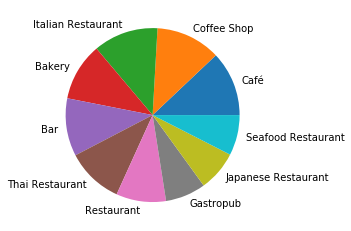

In [93]:
cl_pop_ven(cl_cats, 0, 10).plot(kind='pie', label='')
print('Cluster 1')

Cluster 2


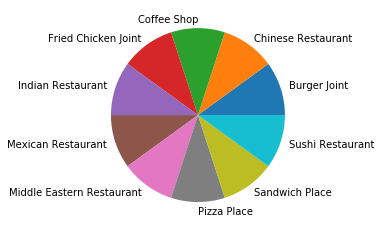

In [94]:
cl_pop_ven(cl_cats, 1, 10).plot(kind='pie', label='')
print('Cluster 2')

Cluster 3


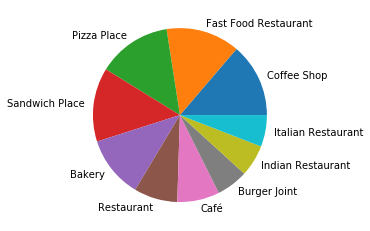

In [95]:
cl_pop_ven(cl_cats, 2, 10).plot(kind='pie', label='')
print('Cluster 3')

Cluster 4


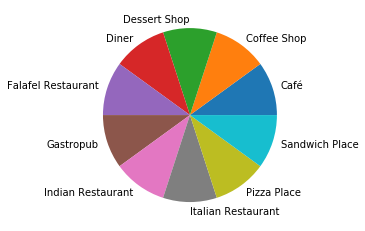

In [96]:
cl_pop_ven(cl_cats, 3, 10).plot(kind='pie', label='')
print('Cluster 4')

Cluster 5


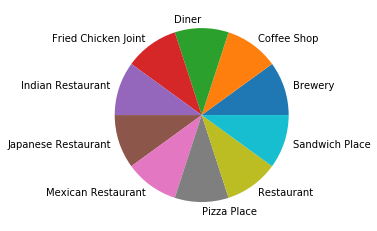

In [97]:
cl_pop_ven(cl_cats, 4, 10).plot(kind='pie', label='')
print('Cluster 5')

In [98]:
df01 = pd.DataFrame(cl_pop_ven(cl_cats, 0, 10)).reset_index()
df02 = pd.DataFrame(cl_pop_ven(cl_cats, 1, 10)).reset_index()
df03 = pd.DataFrame(cl_pop_ven(cl_cats, 2, 10)).reset_index()
df04 = pd.DataFrame(cl_pop_ven(cl_cats, 3, 10)).reset_index()
df05 = pd.DataFrame(cl_pop_ven(cl_cats, 4, 10)).reset_index()
# df_all = [df01, df02, df03, df04, df05]
df_all = df01

In [99]:
df_all = pd.merge(df_all, df02, on='index', how='outer')
df_all = pd.merge(df_all, df03, on = 'index', how = 'outer')
df_all = pd.merge(df_all, df04, on = 'index', how = 'outer')
df_all = pd.merge(df_all, df05, on = 'index', how = 'outer')
df_all.head()

index     0_x   0_y    0_x   0_y     0
0                Café  1469.0   NaN  226.0  51.0   NaN
1         Coffee Shop  1469.0  26.0  395.0  51.0  19.0
2  Italian Restaurant  1469.0   NaN  169.0  51.0   NaN
3              Bakery  1310.0   NaN  331.0   NaN   NaN
4                 Bar  1310.0   NaN    NaN   NaN   NaN

In [100]:
df_all.columns = ['Category', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']


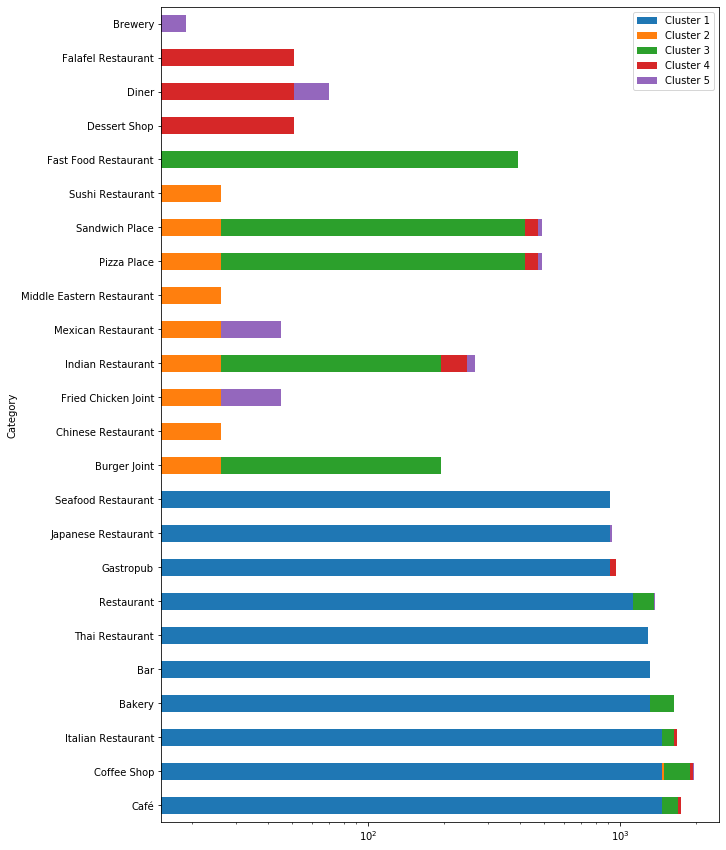

In [101]:
df_all.set_index('Category').plot(kind='barh', figsize=(10,15), logx = True, stacked = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f934053b9b0>,
      dtype=object)

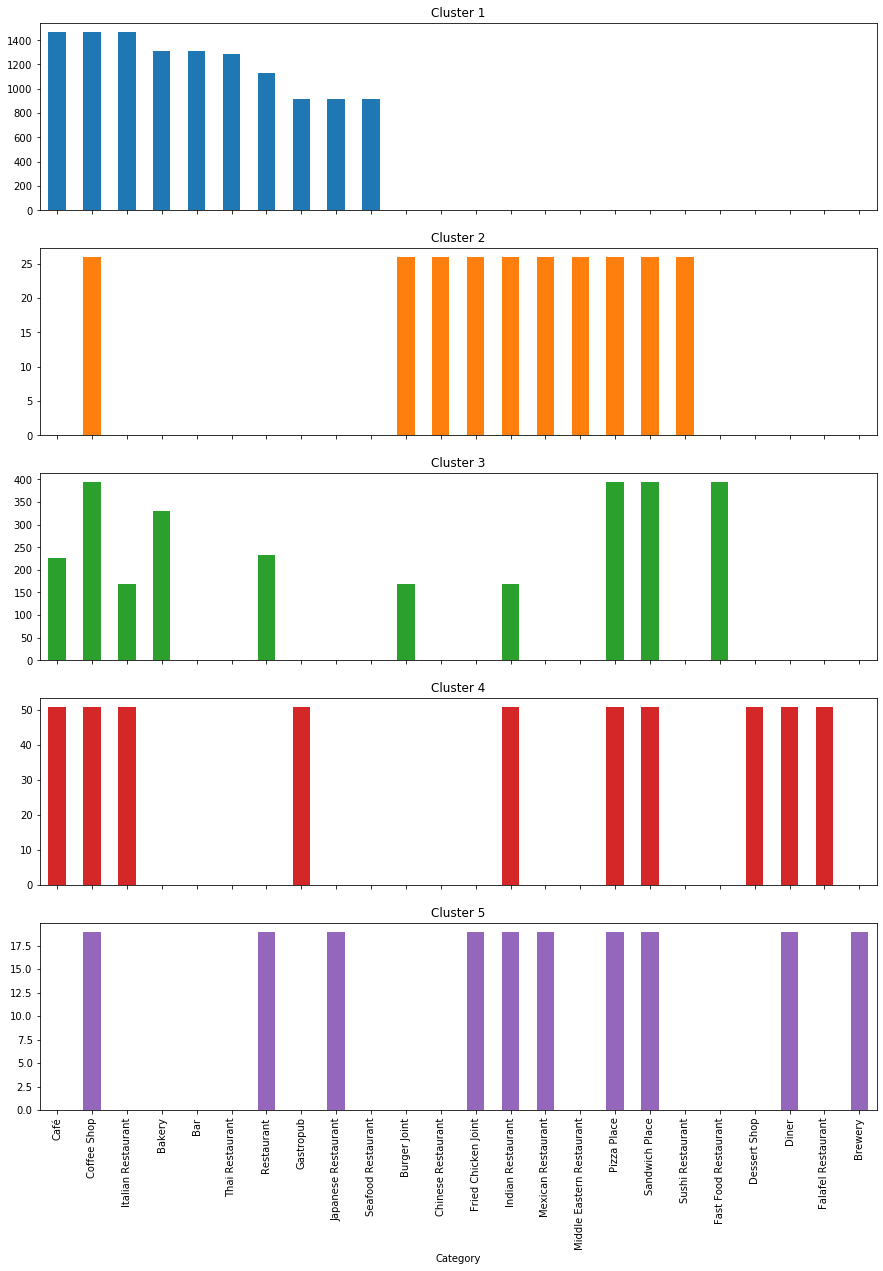

In [102]:
df_all.set_index('Category').plot(kind='bar', figsize=(15,20), logx = False, subplots = True, legend=False)

In [103]:
df_all['Total'] = df_all.sum(axis=1, skipna=True)

In [104]:
df_all

Category  Cluster 1  Cluster 2  Cluster 3  Cluster 4  \
0                        Café     1469.0        NaN      226.0       51.0   
1                 Coffee Shop     1469.0       26.0      395.0       51.0   
2          Italian Restaurant     1469.0        NaN      169.0       51.0   
3                      Bakery     1310.0        NaN      331.0        NaN   
4                         Bar     1310.0        NaN        NaN        NaN   
5             Thai Restaurant     1288.0        NaN        NaN        NaN   
6                  Restaurant     1129.0        NaN      233.0        NaN   
7                   Gastropub      915.0        NaN        NaN       51.0   
8         Japanese Restaurant      915.0        NaN        NaN        NaN   
9          Seafood Restaurant      915.0        NaN        NaN        NaN   
10               Burger Joint        NaN       26.0      169.0        NaN   
11         Chinese Restaurant        NaN       26.0        NaN        NaN   
12        Fried Chicken Joint        NaN       26.0        NaN        NaN   
13          Indian Restaurant        NaN       26.0      169.0       51.0   
14         Mexican Restaurant        NaN       26.0        NaN        NaN   
15  Middle Eastern Restaurant        NaN       26.0        NaN        NaN   
16                Pizza Place        NaN       26.0      395.0       51.0   
17             Sandwich Place        NaN       26.0      395.0       51.0   
18           Sushi Restaurant        NaN       26.0        NaN        NaN   
19       Fast Food Restaurant        NaN        NaN      395.0        NaN   
20               Dessert Shop        NaN        NaN        NaN       51.0   
21                      Diner        NaN        NaN        NaN       51.0   
22         Falafel Restaurant        NaN        NaN        NaN       51.0   
23                    Brewery        NaN        NaN        NaN        NaN   

    Cluster 5   Total  
0         NaN  1746.0  
1        19.0  1960.0  
2         NaN  1689.0  
3         NaN  1641.0  
4         NaN  1310.0  
5         NaN  1288.0  
6        19.0  1381.0  
7         NaN   966.0  
8        19.0   934.0  
9         NaN   915.0  
10        NaN   195.0  
11        NaN    26.0  
12       19.0    45.0  
13       19.0   265.0  
14       19.0    45.0  
15        NaN    26.0  
16       19.0   491.0  
17       19.0   491.0  
18        NaN    26.0  
19        NaN   395.0  
20        NaN    51.0  
21       19.0    70.0  
22        NaN    51.0  
23       19.0    19.0